In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.functional as F

from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader


Epoch: 1

Val Loss: 0.537
***************************************************

Epoch: 2

Val Loss: 0.429
***************************************************

Epoch: 3

Val Loss: 0.333
***************************************************

Epoch: 4

Val Loss: 0.236
***************************************************

Epoch: 5

Val Loss: 0.147
***************************************************

Epoch: 6

Val Loss: 0.098
***************************************************

Epoch: 7

Val Loss: 0.096
***************************************************

Epoch: 8

Val Loss: 0.095
***************************************************

Epoch: 9

Val Loss: 0.096
***************************************************

Epoch: 10

Val Loss: 0.092
***************************************************

Epoch: 11

Val Loss: 0.089
***************************************************

Epoch: 12

Val Loss: 0.091
***************************************************

Epoch: 13

Val Loss: 0.088
**********************

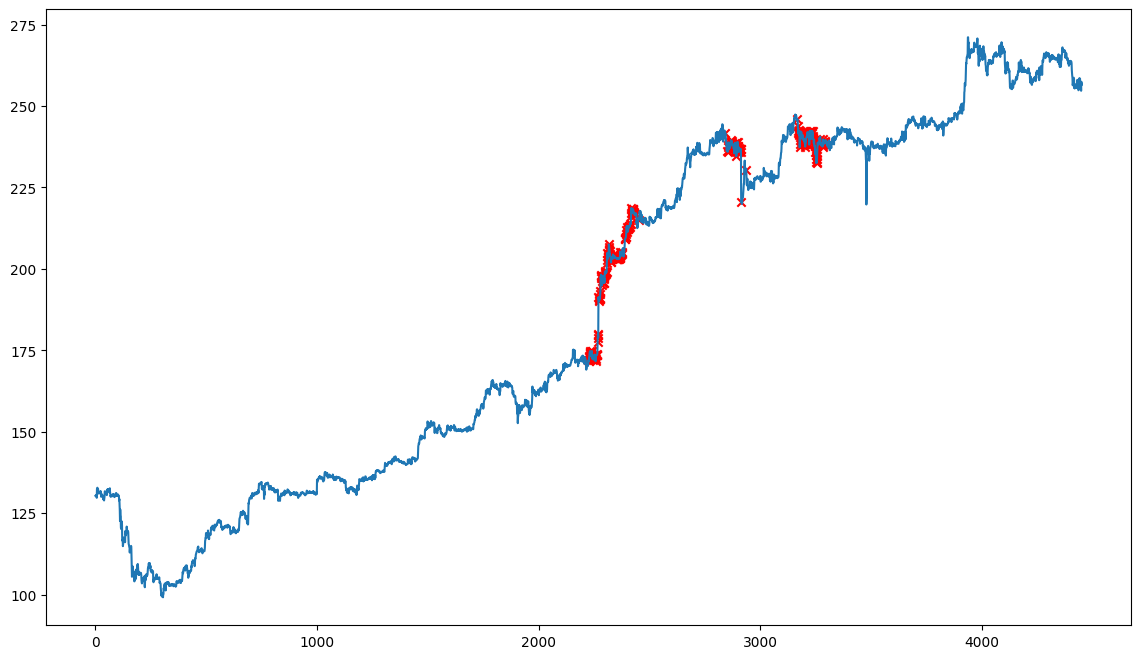

In [2]:
import models
import utils

data = pd.read_csv('data/close_portfolio.csv')
data.columns = ['Time', 'SBERP']


an = models.AnomalyLSTM(data=data, nn_model=models.ModelLSTM(1, 1, 1), num_epochs=15, n_splits=3, threshold=1, all_outputs=True, plot=False, show_print=True)

utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=an.anomalies)

Epoch: 1
Batch 100, Loss: 0.423

Val Loss: 0.530
***************************************************

Epoch: 2
Batch 100, Loss: 0.304

Val Loss: 0.377
***************************************************

Epoch: 3
Batch 100, Loss: 0.198

Val Loss: 0.243
***************************************************

Epoch: 4
Batch 100, Loss: 0.131

Val Loss: 0.145
***************************************************

Epoch: 5
Batch 100, Loss: 0.103

Val Loss: 0.107
***************************************************

Epoch: 6
Batch 100, Loss: 0.098

Val Loss: 0.103
***************************************************

Epoch: 7
Batch 100, Loss: 0.093

Val Loss: 0.096
***************************************************

Epoch: 8
Batch 100, Loss: 0.085

Val Loss: 0.085
***************************************************

Epoch: 9
Batch 100, Loss: 0.072

Val Loss: 0.066
***************************************************

Epoch: 10
Batch 100, Loss: 0.053

Val Loss: 0.040
********************************

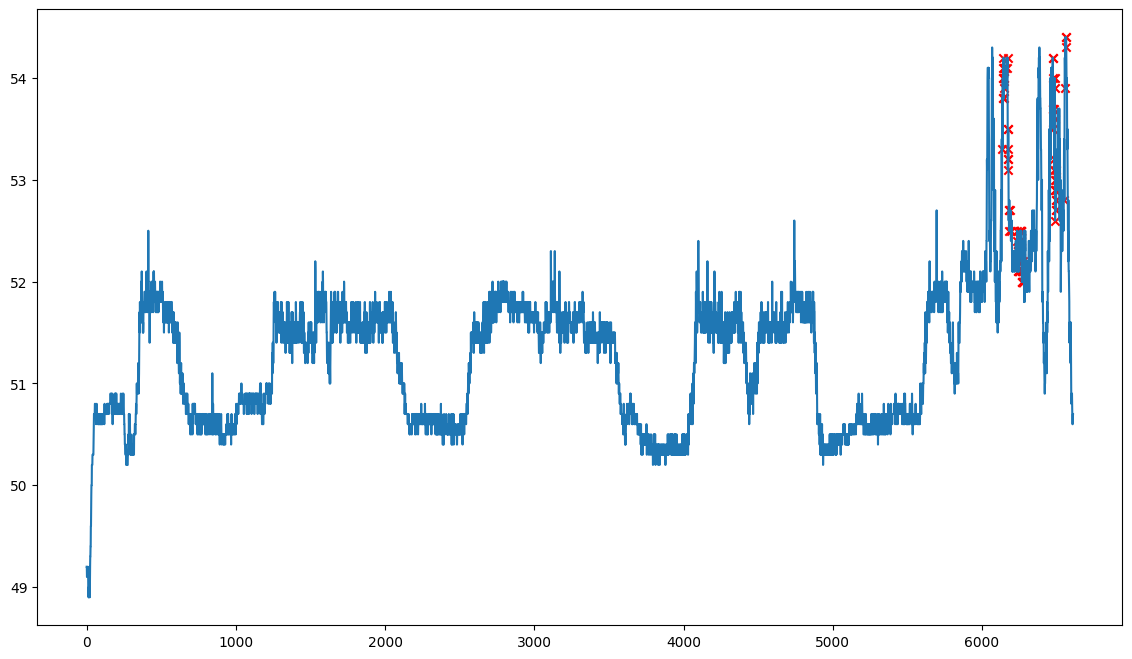

In [3]:
data = pd.read_csv('data/Data.csv', sep=';')

data = data[['Time', 'x013']]

an = models.AnomalyLSTM(data=data, nn_model=models.ModelLSTM(1, 1, 1), num_epochs=15, n_splits=3, threshold=2, all_outputs=True, plot=False, show_print=True)

utils.anomalies_plot(data=data.iloc[:, 1],
                     anomalies=an.anomalies)

In [4]:
# x = np.linspace(-50, 50, 5000)

# y = lambda x: np.cos(x) + x/10

# x_obj = np.random.uniform(-50, 50, 5000)

# y_obj = lambda x: y(x) + np.random.normal(0, 1, size=x_obj.shape)

# y_d = y_obj(np.array(sorted(x_obj)))

# for i in range(1000, 1100):

#     y_d[i] = np.abs(y_d[i]*i/600)

# y_d[1600:1670] *= 25

# df = pd.DataFrame(y_d)

# df['Time'] = data['Time']

# an = models.AnomalyLSTM(data=df, nn_model=models.ModelLSTM(1, 2, 1), n_splits=6, threshold=1, all_outputs=True, plot=False, show_print=True)

# utils.anomalies_plot(data=df.iloc[:, 0],
#                      anomalies=an.anomalies)

In [5]:
an.anomalies[an.anomalies]

6137    True
6138    True
6139    True
6141    True
6142    True
        ... 
6552    True
6557    True
6562    True
6563    True
6564    True
Length: 96, dtype: bool

In [6]:
data = pd.DataFrame(data=[[1, 2, 3],
                          [3, 4, 5],
                          [6, 7, 8]]
                          ,columns=['one', 'two', 'three'])
data

,one,two,three
0,1,2,3
1,3,4,5
2,6,7,8


In [7]:
for i in range(1, 5 + 1):
    data = pd.concat([data, data.iloc[:, 0].shift(i).rename(f'param(t-{i})')], axis=1)

data

,one,two,three,param(t-1),param(t-2),param(t-3),param(t-4),param(t-5)
0,1,2,3,NaN,NaN,NaN,NaN,NaN
1,3,4,5,1.0,NaN,NaN,NaN,NaN
2,6,7,8,3.0,1.0,NaN,NaN,NaN


In [8]:
data.iloc[:, 0].name = 'fda'
data

,one,two,three,param(t-1),param(t-2),param(t-3),param(t-4),param(t-5)
0,1,2,3,NaN,NaN,NaN,NaN,NaN
1,3,4,5,1.0,NaN,NaN,NaN,NaN
2,6,7,8,3.0,1.0,NaN,NaN,NaN


In [9]:
data.iloc[:, 0].shift(0).rename('aaa')

0    1
1    3
2    6
Name: aaa, dtype: int64

In [17]:
n = 10

a = np.random.randint(4, 20, size=(n, n))
a

array([[ 8, 17,  5, 12,  7,  4, 19,  6, 15, 17],
       [ 8,  4,  5,  6, 14, 17,  7,  9, 10, 14],
       [10, 16, 19, 18, 17, 10, 14,  6,  9, 15],
       [ 7,  6, 14, 17, 10, 10, 16, 13,  9, 12],
       [15, 17, 13, 12, 16, 19,  4, 18, 14, 15],
       [ 4,  8, 11, 15,  9,  5, 16,  7,  8, 14],
       [19, 12, 17, 13, 11, 19, 16,  5,  9,  7],
       [18, 19, 18, 10,  9, 11, 10,  5,  9, 18],
       [16, 10, 17,  8, 11, 18, 14,  6, 15, 16],
       [19,  7, 15, 11, 17,  7, 11, 11, 18,  4]])

In [28]:
for i in range(n-1, -1, -1):
    for j in range(n-1, -1, -1):
        a[i][j] += min(a[i - 1][j], a[i][j - 1])
a

array([[40, 25, 22, 17, 19, 11, 23, 23, 21, 32],
       [16, 12,  9, 11, 20, 21, 24, 15, 19, 24],
       [18, 20, 24, 24, 31, 27, 21, 15, 15, 24],
       [17, 13, 20, 31, 27, 20, 26, 19, 18, 21],
       [22, 23, 27, 25, 26, 29, 20, 22, 23, 27],
       [19, 12, 19, 26, 24, 14, 20, 23, 15, 22],
       [23, 20, 28, 28, 20, 24, 32, 12, 14, 16],
       [37, 31, 35, 23, 19, 20, 21, 10, 14, 25],
       [34, 26, 27, 18, 19, 29, 24, 11, 21, 31],
       [35, 17, 22, 19, 28, 24, 18, 17, 29, 20]])